In [1]:
import pandas as pd

data = '/home/chlab/flync/src/data'

X_train = pd.read_parquet(f"{data}/X_train_redux.parquet")
X_test = pd.read_parquet(f"{data}/X_test_redux.parquet")
X_val = pd.read_parquet(f"{data}/X_val_redux.parquet")

## CPAT
We have prepared some datasets where we exluded CPAT features to test if the final model would benefit or not from previously running CPAT and using its output as features

In [2]:
# Also drop all 'cpat_*' columns
X_train_no_cpat = X_train.loc[:, ~X_train.columns.str.startswith("cpat_")]
X_test_no_cpat = X_test.loc[:, ~X_test.columns.str.startswith("cpat_")]
X_val_no_cpat = X_val.loc[:, ~X_val.columns.str.startswith("cpat_")]

X_train_no_cpat.to_parquet(f"{data}/X_train_redux_no_CPAT.parquet")
X_test_no_cpat.to_parquet(f"{data}/X_test_redux_no_CPAT.parquet")
X_val_no_cpat.to_parquet(f"{data}/X_val_redux_no_CPAT.parquet")

# Filter #1
From the tests we have performed on genomic features, a subset of the agregated features (coverage, mean, standard-deviation, etc...) is more imporant then its counterparts for the same genomic track (as stated by the feature importance charts). After our evaluation, the top performer features for each track are:
- max_remap
- max_tfbs
- sum_s2_pol2
- cov_h3k4me3
- min_tss_minus
- max_tss_plus
- cov_epdnew
- mean_gc
- mean_pcons27
- std_phylocons124

For this filter, we will keep only these features for the genomic tracks as extracted by the `bwq.py` script.

In [3]:
init_shape_train = X_train.shape
init_shape_test = X_test.shape
init_shape_val = X_val.shape

# Get all columns from genomic tracks (ending with: _remap, _tfbs, _s2_pol2, _h3k4me3, _tss_minus, _tss_plus, _epdnew, _gc, _pcons27, phylocons124)
genomic_track_columns = X_train.columns[
    X_train.columns.str.endswith((
        "_remap", "_tfbs", "_s2_pol2", "_h3k4me3", "_tss_minus", "_tss_plus", "_epdnew", "_gc", "_pcons27", "phylocons124"
    ))
]

print(f"Genomic track columns: {genomic_track_columns.tolist()}")

# State which columns to KEEP
cols_to_keep = ['max_remap', 'max_tfbs', 'sum_s2_pol2', 'cov_h3k4me3', 'min_tss_minus', 'max_tss_plus', 'cov_epdnew', 'mean_gc', 'mean_pcons27', 'std_phylocons124']

# Remove cols_to_keep from genomic_track_columns
cols_to_drop = genomic_track_columns[~genomic_track_columns.isin(cols_to_keep)]

print(f"Columns to drop: {cols_to_drop.tolist()}")


X_train = X_train.loc[:, ~X_train.columns.isin(cols_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.isin(cols_to_drop)]
X_val = X_val.loc[:, ~X_val.columns.isin(cols_to_drop)]

final_shape_train = X_train.shape
final_shape_test = X_test.shape
final_shape_val = X_val.shape

print(f"Initial shapes: train={init_shape_train}, test={init_shape_test}, val={init_shape_val}")
print(f"Final shapes: train={final_shape_train}, test={final_shape_test}, val={final_shape_val}")

Genomic track columns: ['cov_epdnew', 'cov_h3k4me3', 'cov_remap', 'cov_s2_pol2', 'cov_tfbs', 'cov_tss_minus', 'cov_tss_plus', 'max_remap', 'max_s2_pol2', 'max_tfbs', 'max_tss_plus', 'mean_gc', 'mean_h3k4me3', 'mean_pcons27', 'mean_phylocons124', 'min_tss_minus', 'std_phylocons124', 'std_pcons27', 'sum_phylocons124', 'sum_h3k4me3', 'sum_pcons27', 'sum_s2_pol2', 'sum_tss_minus', 'sum_tss_plus']
Columns to drop: ['cov_remap', 'cov_s2_pol2', 'cov_tfbs', 'cov_tss_minus', 'cov_tss_plus', 'max_s2_pol2', 'mean_h3k4me3', 'mean_phylocons124', 'std_pcons27', 'sum_phylocons124', 'sum_h3k4me3', 'sum_pcons27', 'sum_tss_minus', 'sum_tss_plus']
Initial shapes: train=(23034, 736), test=(4936, 736), val=(4936, 736)
Final shapes: train=(23034, 722), test=(4936, 722), val=(4936, 722)


In [4]:
X_train.to_parquet(f"{data}/X_train_redux_filter_1.parquet")
X_test.to_parquet(f"{data}/X_test_redux_filter_1.parquet")
X_val.to_parquet(f"{data}/X_val_redux_filter_1.parquet")

In [5]:
# Also drop all 'cpat_*' columns
X_train_no_cpat = X_train.loc[:, ~X_train.columns.str.startswith("cpat_")]
X_test_no_cpat = X_test.loc[:, ~X_test.columns.str.startswith("cpat_")]
X_val_no_cpat = X_val.loc[:, ~X_val.columns.str.startswith("cpat_")]

X_train_no_cpat.to_parquet(f"{data}/X_train_redux_filter_1_no_CPAT.parquet")
X_test_no_cpat.to_parquet(f"{data}/X_test_redux_filter_1_no_CPAT.parquet")
X_val_no_cpat.to_parquet(f"{data}/X_val_redux_filter_1_no_CPAT.parquet")

In [6]:
# Also perform SMOTE on filter 2
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=99)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.drop(columns=["y"]), X_train["y"])

X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.drop(columns=["y"]).columns)
X_train_resampled["y"] = y_train_resampled

X_train_resampled.to_parquet(f"{data}/X_train_redux_filter_1_no_CPAT_smote.parquet")


/home/chlab/flync/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/tmp/ipykernel_41190/1974017178.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_resampled["y"] = y_train_resampled


# Filter #2
After filter #1, the dataset is still very wide (~13k features), since we are still retrieving names from REMAP and JASPAR.
Our investigation shows that JASPAR features are already contained within the REMAP track, so, at runtime, extracting JASPAR BigBed names is redundant.

In this filter, we are trying to reduce the complexity of the model, even though having singled-out regulators in the dataset might be more powerfull then an agregated feature.
To do so, we will trop all `merged_*`, `tfbs_*` and `remap_*` boolean feautres (since we already dropped `epdnew_*` in filter #1).

In [7]:
init_shape_train = X_train.shape
init_shape_test = X_test.shape
init_shape_val = X_val.shape

# Drop all `merged_*` columns
X_train = X_train.loc[:, ~X_train.columns.str.startswith(("merged_", "tfbs_", "remap_"))]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(("merged_", "tfbs_", "remap_"))]
X_val = X_val.loc[:, ~X_val.columns.str.startswith(("merged_", "tfbs_", "remap_"))]

final_shape_train = X_train.shape
final_shape_test = X_test.shape
final_shape_val = X_val.shape

print(f"Initial shapes: train={init_shape_train}, test={init_shape_test}, val={init_shape_val}")
print(f"Final shapes: train={final_shape_train}, test={final_shape_test}, val={final_shape_val}")

Initial shapes: train=(23034, 722), test=(4936, 722), val=(4936, 722)
Final shapes: train=(23034, 27), test=(4936, 27), val=(4936, 27)


In [8]:
X_train.to_parquet(f"{data}/X_train_redux_filter_2.parquet")
X_test.to_parquet(f"{data}/X_test_redux_filter_2.parquet")
X_val.to_parquet(f"{data}/X_val_redux_filter_2.parquet")

In [9]:
# Also drop all 'cpat_*' columns
X_train_no_cpat = X_train.loc[:, ~X_train.columns.str.startswith("cpat_")]
X_test_no_cpat = X_test.loc[:, ~X_test.columns.str.startswith("cpat_")]
X_val_no_cpat = X_val.loc[:, ~X_val.columns.str.startswith("cpat_")]

X_train_no_cpat.to_parquet(f"{data}/X_train_redux_filter_2_no_CPAT.parquet")
X_test_no_cpat.to_parquet(f"{data}/X_test_redux_filter_2_no_CPAT.parquet")
X_val_no_cpat.to_parquet(f"{data}/X_val_redux_filter_2_no_CPAT.parquet")

# Feature comparison playground
Change the name of the `feature` variable to vizualize how well it can distinguish between lncRNA and CDS

In [10]:
# Reload dataset
X_train = pd.read_parquet(f"{data}/X_train_redux.parquet")


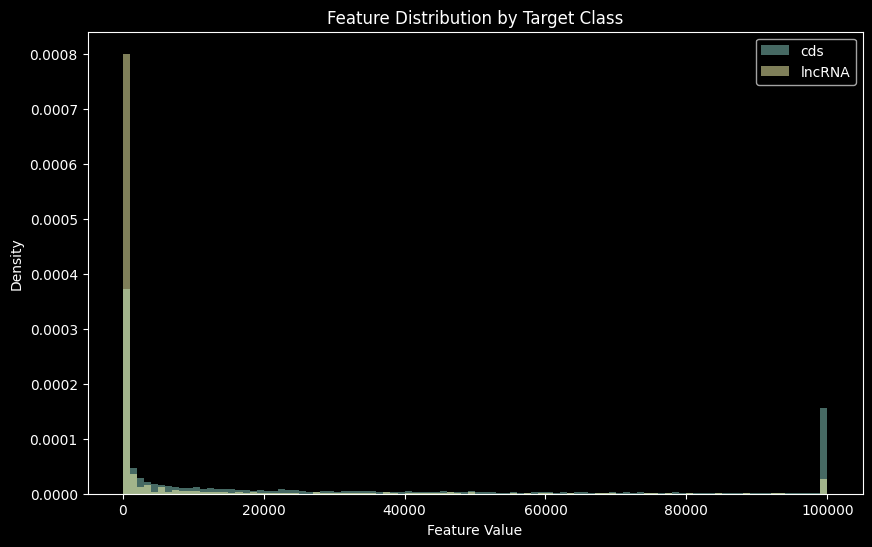

In [11]:
# Select feature and bins for graph
feature = 'max_tss_plus'  # Change this to visualize different features
bins = 100

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Distribution by Target Class")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.hist(X_train[X_train['y'] == 0][feature], bins=bins, alpha=0.5, label='cds', density=True)
plt.hist(X_train[X_train['y'] == 1][feature], bins=bins, alpha=0.5, label='lncRNA', density=True)
plt.legend()
plt.show()